In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
housing = pd.read_csv("train.csv")

In [4]:
housing.shape

(1460, 81)

In [5]:
housing.head( n = 3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

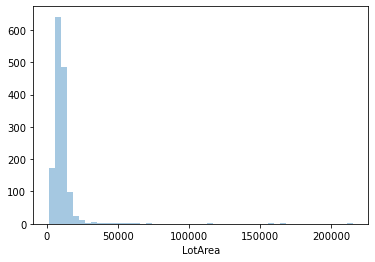

In [9]:
sns.distplot(housing["LotArea"], kde = False);

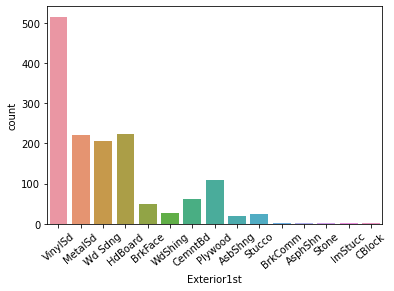

In [18]:
plot = sns.countplot(x = "Exterior1st", data = housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 40);

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

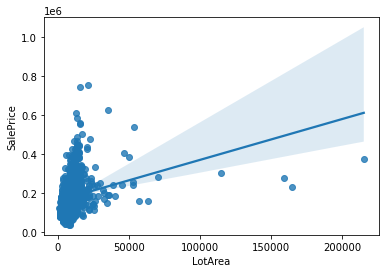

In [19]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing)

In [21]:
housing["LotArea"].quantile([0.5,0.95,0.99])
housing_sub = housing.loc[housing["LotArea"] < housing["LotArea"].quantile(0.95)]

0.50     9478.50
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

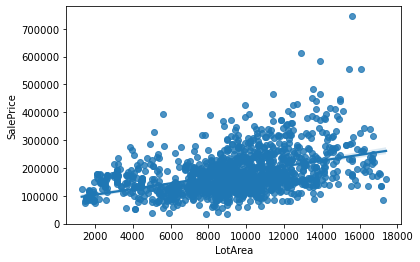

In [23]:
sns.regplot(x = "LotArea", y ="SalePrice", data = housing_sub)

In [24]:
housing["LotArea"].corr(housing["SalePrice"])
housing_sub["LotArea"].corr(housing_sub["SalePrice"])

0.26384335387140573

0.430209991289777

In [25]:
sf_cols = [col_name for col_name in housing.columns if "SF" in col_name]

In [28]:
len(sf_cols)

9

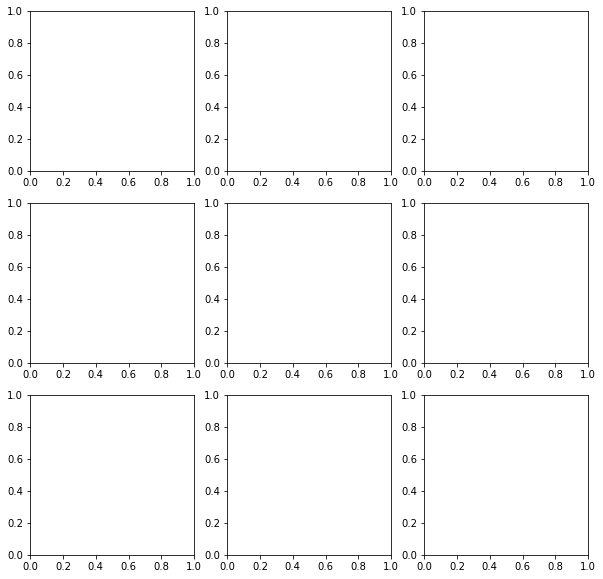

In [29]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))

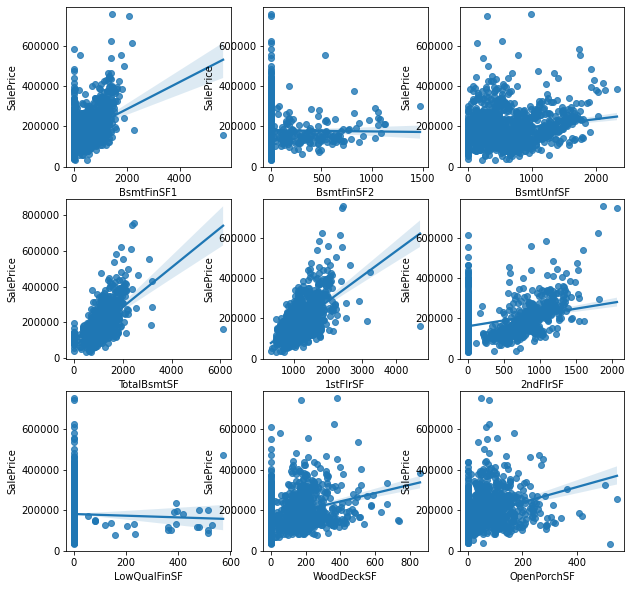

In [31]:
fig, axs = plt.subplots(nrows = 3, ncols = 3 , figsize = (10,10))
for i in range(0,len(sf_cols)):
    rows = i//3
    cols = i% 3
    ax = axs[rows,cols]
    plot = sns.regplot(x = sf_cols[i], y = "SalePrice" , data= housing, ax = ax )

In [33]:
housing["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

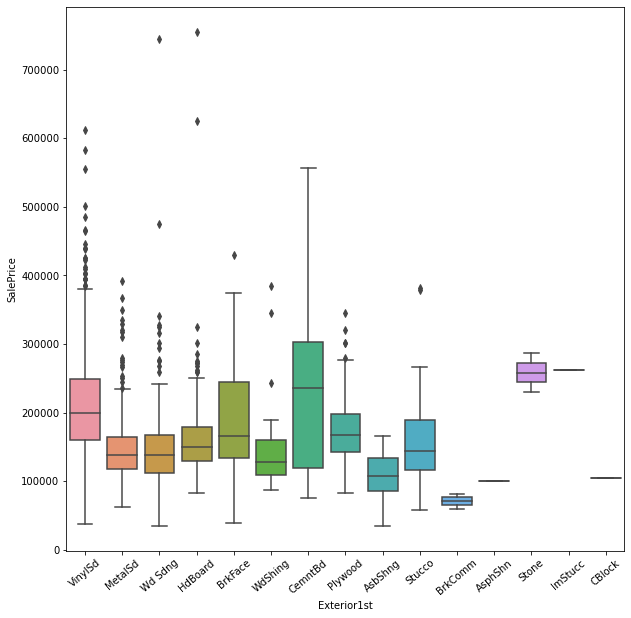

In [41]:
fig, axs = plt.subplots(figsize = (10,10))

plot = sns.boxplot(x = "Exterior1st", y = "SalePrice", data = housing, ax = axs)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 40);

In [42]:
top_3_exterior = housing["Exterior1st"].value_counts().head(3)

In [43]:
top_3_exterior = list(top_3_exterior.index)

In [44]:
housing["Exterior_new"] = np.where(housing["Exterior1st"].isin(top_3_exterior), housing["Exterior1st"], "Others")

In [47]:
housing["Exterior_new"].value_counts()

VinylSd    515
Others     503
HdBoard    222
MetalSd    220
Name: Exterior_new, dtype: int64

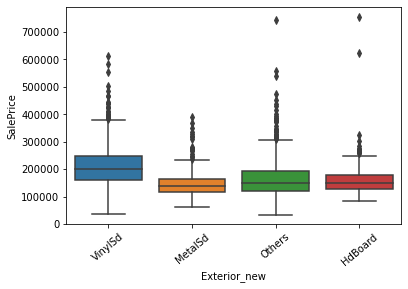

In [48]:
plot = sns.boxplot(x = "Exterior_new", y = "SalePrice", data = housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 40);

In [49]:
housing["new_house"] = np.where(housing["YearBuilt"]> 2000, "New", "Old")

In [50]:
housing["new_house"].value_counts()

Old    1096
New     364
Name: new_house, dtype: int64

<AxesSubplot:xlabel='new_house', ylabel='SalePrice'>

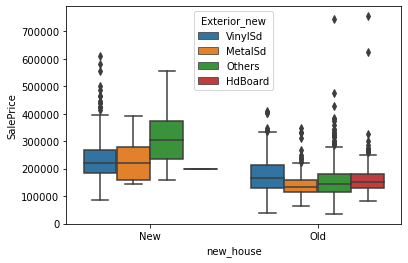

In [51]:
sns.boxplot(x = "new_house", y = "SalePrice", hue = "Exterior_new", data = housing)

In [53]:
housing.groupby(["Exterior_new", "new_house"]).agg({"SalePrice" :["count", "median"]})

SalePrice          
                           count    median
Exterior_new new_house                    
HdBoard      New               1  198500.0
             Old             221  149900.0
MetalSd      New              19  222000.0
             Old             201  135000.0
Others       New              35  303477.0
             Old             468  142976.5
VinylSd      New             309  219500.0
             Old             206  167075.0

<AxesSubplot:xlabel='new_house', ylabel='count'>

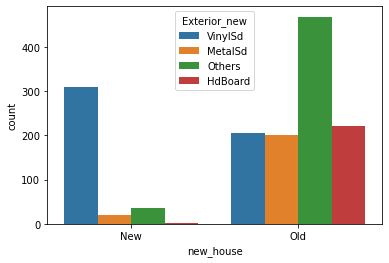

In [54]:
sns.countplot(x = "new_house", data = housing, hue = "Exterior_new")